In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from datetime import datetime as dt, timedelta as td
from filterpy.kalman import KalmanFilter
from sklearn.metrics import mean_absolute_error

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('../Datasets/NVDA Historical Data.csv')
df1=df['Price'].values

In [3]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [4]:
# Xây dựng mô hình Kalman
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([train_data[0], 0])   # trạng thái ban đầu
kf.F = np.array([[1., 1.], [0., 1.]])   # ma trận chuyển đổi trạng thái
kf.H = np.array([[1., 0.]])             # ma trận quan sát
kf.P = np.diag([1., 1.])                # ma trận hiệp phương sai ban đầu
kf.R = np.array([[1.]])                 # ma trận nhiễu đo
kf.Q = np.array([[0.1, 0.], [0., 0.1]]) # ma trận nhiễu quá trình

In [5]:
for i in range(len(train_data)):
    kf.predict()
    kf.update(np.array([train_data[i]]))

In [6]:
future_prices_test = []
for i in range(len(test_data)):
    kf.predict()
    future_prices_test.append(kf.x[0])
    # kf.update(np.array([test_data[i]]))

In [7]:
for i in range(len(test_data)):
    kf.predict()
    kf.update(np.array([test_data[i]]))

In [8]:
future_prices_val = []
for i in range(len(val_data)):
    kf.predict()
    future_prices_val.append(kf.x[0])
    # kf.update(np.array([val_data[i]]))

In [9]:
for i in range(len(val_data)):
    kf.predict()
    kf.update(np.array([val_data[i]]))

In [10]:
# Đánh giá độ chính xác thuật toán bằng RMSE, MAE
valid_rmse = np.sqrt(np.mean((future_prices_val - val_data)**2))
test_rmse = np.sqrt(np.mean((future_prices_test - test_data)**2))

valid_mae = mean_absolute_error(future_prices_val, val_data)
test_mae = mean_absolute_error(future_prices_test, test_data)

print('Validation RMSE:', valid_rmse)
print('Validation MAE:', valid_mae)

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)

Validation RMSE: 43.92360542585679
Validation MAE: 31.134738454487433
Testing RMSE: 124.52743284220995
Testing MAE: 113.73785164545207


In [11]:
# Dự đoán giá cổ phiếu của 30 ngày tiếp theo
future_prices = []
for i in range(30):
    kf.predict()
    future_prices.append(kf.x[0])

Validation RMSE: 43.92360542585679
Validation MAE: 31.134738454487433
Testing RMSE: 124.52743284220995
Testing MAE: 113.73785164545207


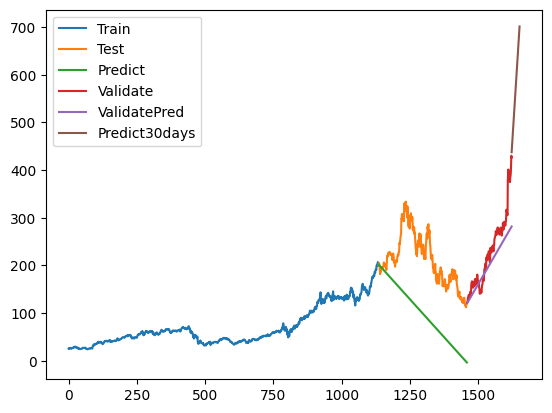

In [12]:
# 14.Vẽ hình
print('Validation RMSE:', valid_rmse)
print('Validation MAE:', valid_mae)

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,test_data)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,future_prices_test)

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,val_data)

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,future_prices_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,future_prices)

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

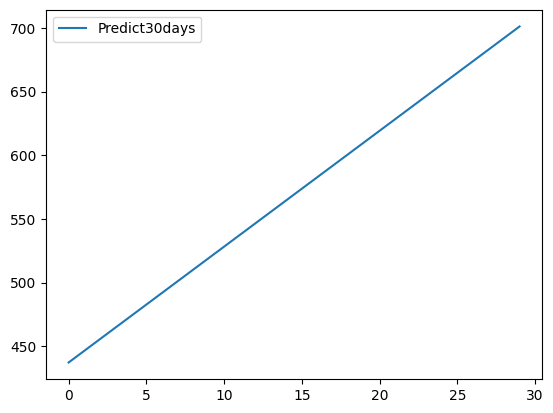

In [13]:
# 15.Vẽ hình Predict 30 days
prediect_data_index = pd.RangeIndex(start=0, stop=30, step=1)
plt.plot(prediect_data_index,future_prices)

plt.legend(['Predict30days'])
plt.show()

In [14]:
print(future_prices)

[437.2909862697696, 446.38767897265024, 455.4843716755309, 464.58106437841155, 473.6777570812922, 482.7744497841729, 491.87114248705353, 500.9678351899342, 510.06452789281485, 519.1612205956956, 528.2579132985762, 537.3546060014569, 546.4512987043375, 555.5479914072182, 564.6446841100989, 573.7413768129795, 582.8380695158602, 591.9347622187408, 601.0314549216215, 610.1281476245022, 619.2248403273828, 628.3215330302635, 637.4182257331441, 646.5149184360248, 655.6116111389055, 664.7083038417861, 673.8049965446668, 682.9016892475474, 691.9983819504281, 701.0950746533088]
